# 加载数据

In [ ]:
#全部数据
import pandas as pd
import os

data_path=os.listdir('data')
data_path.sort()
data_path=data_path[1:]
# data_path
for i,p in enumerate(data_path):
    df =pd.read_csv(os.path.join('data',p))
    if i > 0:
        a=np.append(a,df['Var2'][1:].values)
    else:
        a = df['Var2'][1:].values  

np.save('data_x.npy',a)

In [ ]:
#部分数据，活动：A0：坐；A5A6：上下楼梯；A12：跑步机跑步；
import pandas as pd
import os

data_path=os.listdir('data')
data_path.sort()
data_path=data_path[1:]
# data_path
for i,p in enumerate(data_path):
    df =pd.read_csv(os.path.join('data',p))
    if i > 0:
        a=np.append(a,df['Var2'][1:].values)
    else:
        a = df['Var2'][1:].values  

np.save('data_three.npy',a)

In [ ]:
#coding=utf-8
import numpy as np
import time
data=np.load('data_three.npy')#没有加log
a=data
a_nomal=(a-np.min(a))/(np.max(a)-np.min(a))
a_re=a_nomal.reshape(-1,30000)
a_re=np.vstack((a_re[:15],a_re[43:]))
#add noise(14,43,56)
a_noise=[]
start_time=time.time()

for j in range(a_re.shape[0]):
    for i in range(50):
        for k in range(30000):
                tmp=a_re[j,k]+a_re[j,k]/10 *np.random.randn(1)
                if tmp <0:
                        a_noise.append(np.array([a_re[j,k]]))
                elif tmp >0 and tmp < 1:
                        a_noise.append(tmp)
                else:
                        a_noise.append(np.array([a_re[j,k]]))
    print('当前进度为{0}/28,所花费时间为{1},平均花费时间{2}'.format(j+1,time.time()-start_time,(time.time()-start_time)/(j+1)))

    
aa=np.array(a_noise) 
# np.save('data_nomal_0-50.npy',aa)
# np.save('data_nomal_50-100.npy',aa)




In [ ]:
np.save('data_view_1.npy',aa)

# 数据增强

In [ ]:
#coding=utf-8
import numpy as np
import time
data=np.load('data_three.npy')#没有加log
a=data
a_nomal=(a-np.min(a))/(np.max(a)-np.min(a))
a_re=a_nomal.reshape(-1,30000)
#add noise(14,43,56)
a_noise=[]
start_time=time.time()
for i in range(50):
    for j in range(a_re.shape[0]):
        for k in range(30000):
                tmp=a_re[j,k]+a_re[j,k]/10 *np.random.randn(1)
                if tmp <0:
                        a_noise.append(np.array([a_re[j,k]]))
                elif tmp >0 and tmp < 1:
                        a_noise.append(tmp)
                else:
                        a_noise.append(np.array([a_re[j,k]]))
    print('当前进度为{0}/50,所花费时间为{1},平均花费时间{2}'.format(i+1,time.time()-start_time,(time.time()-start_time)/(i+1)))

    
aa=np.array(a_noise) 
# np.save('data_nomal_0-50.npy',aa)
# np.save('data_nomal_50-100.npy',aa)


# 测试数据生成

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def sin_wave(start,end,zhouqi,midu):
    '''
    :param start: the fist value of the wave
    :param end:  the end value of the wave
    :param zhouqi:  the zhouqi range of the wave
    :param midu:  every zhouqi, there are how many points in this zhouqi
    :return: the x array and the y array
    '''
 
    # 根据numpy的sin函数，生成对应的y的坐标。
    # y = np.sin(x)
    xout=[]
    yout=[]
    for i in range(start,end,zhouqi):
        x = np.arange(i, i + zhouqi,  midu)
        # y = np.where(x<start+0.5, x-start, 0)
        y = np.sin(x)
 
        xout = np.append(xout, x)
        yout = np.append(yout, y)
    return xout,yout
 
 
 
 
 
def triangle_wave(start,end,zhouqi,midu):
    '''
    :param start: the fist value of the wave
    :param end:  the end value of the wave
    :param zhouqi:  the zhouqi range of the wave
    :param midu:  every zhouqi, there are how many points in this zhouqi
    :return: the x array and the y array
    '''
 
    xout=[]
    yout=[]
    for i in range(start,end,zhouqi):
        x = np.arange(i, i + zhouqi,  midu)
        # y = np.where(x<start+0.5, x-start, 0)
        y = np.where(x >= i + zhouqi/2, i + zhouqi - x, x - i)
 
        xout = np.append(xout, x)
        yout = np.append(yout, y)
    return xout,yout
 
 
 
def square_wave(start,end,zhouqi,midu):
    '''
    :param start: the fist value of the wave
    :param end:  the end value of the wave
    :param zhouqi:  the zhouqi range of the wave
    :param midu:  every zhouqi, there are how many points in this zhouqi
    :return: the x array and the y array
    '''
    xout = []
    yout = []
    for i in range(start,end,zhouqi):
        x = np.arange(i, i + zhouqi,  midu)
        # y = np.where(x<start+0.5, x-start, 0)
        y = np.where(x >= i+ zhouqi/2, 1,0)
 
        xout = np.append(xout, x)
        yout = np.append(yout, y)
    return xout, yout
 
 
 
def swatooth_wave(start,end,zhouqi,midu):
    '''
    :param start: the fist value of the wave
    :param end:  the end value of the wave
    :param zhouqi:  the zhouqi range of the wave
    :param midu:  every zhouqi, there are how many points in this zhouqi
    :return: the x array and the y array
    '''
    xout = []
    yout = []
    for i in range(start,end,zhouqi):
        x = np.arange(i, i + zhouqi, midu)
        # y = np.where(x<start+0.5, x-start, 0)
        y = np.where(x >= i, i + zhouqi - x, x - i)
 
        xout = np.append(xout, x)
        yout = np.append(yout, y)
    return xout, yout


def maxminnorm(array):
    maxcols=array.max(axis=1)
    mincols=array.min(axis=1)
    data_shape = array.shape
    data_rows = data_shape[0]
    data_cols = data_shape[1]
    t=np.empty((data_rows,data_cols))
    for i in range(data_rows):
        t[i,:]=(array[i,:]-mincols[i])/(maxcols[i]-mincols[i])
    return t

In [ ]:
import random
T_value=[5,10,20,25,40,50,100]
y_sin=[]
y_triangle=[]
y_square=[]
sample_rate=.2
for i in range(100):
    T=random.choice(T_value)
    for j in range(100):
        end=random.randint(200,1000)
        start=end-200
        x1,y1=sin_wave(start,end,T,sample_rate)
        x2,y2=triangle_wave(0,200,T,sample_rate)
        x3,y3=square_wave(0,200,T,sample_rate)
        y_sin=np.append(y_sin,y1)
        y_triangle=np.append(y_triangle,y2)
        y_square=np.append(y_square,y3)


In [ ]:
X_=np.vstack((y_sin,y_triangle))
X=np.vstack((X_,y_square))
X=X.reshape(-1,1000)

In [ ]:
X[10000:20000]=maxminnorm(X[10000:20000])

In [ ]:
np.save('data_X1000.npy',X)

# vae后数据生成

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)
        # decoder part
        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h) # mu, log_var
    
    def sampling(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu) # return z sample
        
    def decoder(self, z):
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        return F.sigmoid(self.fc6(h)) 
    
    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

# return reconstruction error + KL divergence losses
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')

    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD    


class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(d_input_dim, 1)
#         self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features//2)
#         self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features//2)
#         self.fc4 = nn.Linear(self.fc3.out_features, 1)
    
    # forward method
    def forward(self, x):
#         x = F.leaky_relu(self.fc1(x), 0.2)
#         x = F.dropout(x, 0.3)
#         x = F.leaky_relu(self.fc2(x), 0.2)
#         x = F.dropout(x, 0.3)
#         x = F.leaky_relu(self.fc3(x), 0.2)
#         x = F.dropout(x, 0.3)
#         return torch.sigmoid(self.fc4(x))
        return torch.sigmoid(self.fc1(x))

vae=torch.load('model_vae.pt')
vae.cuda()

# X1=np.load('data_nomal_0-50.npy')
# X2=np.load('data_nomal_50-100.npy')
# X_1=X1.reshape(-1,30000)
# X_2=X2.reshape(-1,30000)
# X=np.vstack((X_1,X_2))

data=np.load('data_three.npy')#没有加log
a=data
a_nomal=(a-np.min(a))/(np.max(a)-np.min(a))
a_re=a_nomal.reshape(-1,30000)
a_re=np.vstack((a_re[:15],a_re[43:]))
X=a_re

In [12]:
a_s=[]

In [13]:
for num in range(28):
    x=torch.from_numpy(X)
    ii=x[num].float().cuda()
    output=vae(ii)
    a=output[0].cpu()
    a=a.detach().numpy()
    a_s.append(a)

In [16]:
a_s=np.array(a_s)

In [19]:
a_s

array([[1.1383227e-07, 4.4717450e-07, 6.4531491e-07, ..., 2.1312185e-07,
        5.6289775e-07, 1.9571653e-06],
       [3.8987967e-08, 1.0741807e-07, 1.2445192e-07, ..., 4.9290385e-08,
        1.2739956e-07, 4.7072442e-07],
       [4.9344468e-08, 1.8851250e-07, 2.3019102e-07, ..., 1.5758503e-07,
        5.6512619e-07, 1.5088814e-06],
       ...,
       [4.1782278e-06, 4.7018479e-05, 1.6660336e-04, ..., 9.8582350e-05,
        7.6618177e-05, 8.6877175e-05],
       [7.0531243e-03, 5.0113644e-02, 9.5366679e-02, ..., 1.2674356e-04,
        1.5968962e-04, 3.5546895e-05],
       [1.0180818e-03, 8.9736916e-03, 2.2739775e-02, ..., 9.8266220e-04,
        1.1741812e-03, 9.7904740e-05]], dtype=float32)

In [20]:
X

array([[8.50230334e-10, 4.80395180e-09, 6.86889695e-09, ...,
        3.49722158e-08, 3.74854510e-08, 2.50954498e-08],
       [3.47969564e-09, 2.40718143e-08, 4.79158075e-08, ...,
        1.67415092e-07, 4.96575496e-07, 1.07236338e-06],
       [4.21043594e-07, 3.00230417e-06, 6.23624555e-06, ...,
        4.29485565e-06, 8.85438033e-06, 1.56500674e-05],
       ...,
       [9.18131758e-07, 1.38332597e-05, 5.88172637e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.20722101e-03, 4.14593318e-02, 7.83963845e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.56927006e-03, 1.28395019e-02, 3.17860705e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
v=np.linspace(0,100,30000)


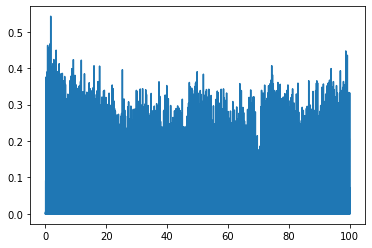

In [31]:
fig, ax = plt.subplots()
ax.plot(v,X[23])

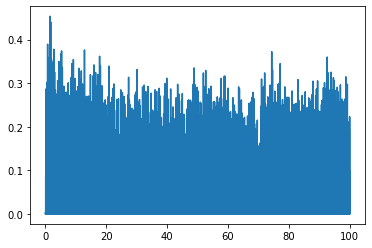

In [30]:
fig, ax = plt.subplots()
ax.plot(v,a_s[23])